In [27]:
import os
import numpy as np
import pickle
from PIL import Image
import matplotlib.pyplot as plt
from sampling import *

immat_dir = r"C:\Users\Kyler\Desktop\UROP\Data\Cell Data\immature_processed\edges"
mat_dir = r"C:\Users\Kyler\Desktop\UROP\Data\Cell Data\mature_processed\edges"
im1 = Image.open(os.path.join(immat_dir, "iDC-2edge_smoothed.tif"))
ar1 = np.array(im1)

In [29]:
p1 = sample(ar1)
k, r = 25, 2000
evals, evecs = GFT(p1, k=k, r=r)

Graph is connected:  True


In [22]:
k, r = 25, 2000
CL_dict = dict()
alpha_list = np.arange(0.1, 1.1, 0.1).tolist()
for a in alpha_list:
    a = round(a, 3)
    print("alpha=", a)
    CL_evals, CL_evecs = CLGFT(p1, alpha=a, k=k, r=r)
    CL_dict[a] = [CL_evals, CL_evecs]

alpha= 0.1
Graph is connected:  True
alpha= 0.2
Graph is connected:  True
alpha= 0.3
Graph is connected:  True
alpha= 0.4
Graph is connected:  True
alpha= 0.5
Graph is connected:  True
alpha= 0.6
Graph is connected:  True
alpha= 0.7
Graph is connected:  True
alpha= 0.8
Graph is connected:  True
alpha= 0.9
Graph is connected:  True
alpha= 1.0
Graph is connected:  True


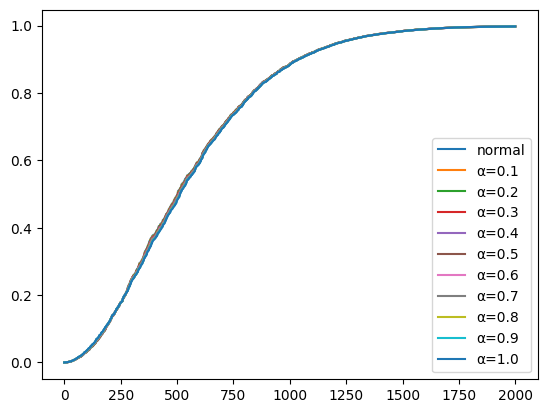

In [23]:
# Eigenvectors are the same
plt.plot(evals, label="normal")
for a in CL_dict.keys():
    plt.plot(CL_dict[a][0], label="α="+str(a))
plt.legend()
plt.show()

# Projecting Image onto Eigenvectors

In [79]:
x = np.zeros(5000)
for i in range(2000):
    x += evals[i] * evecs[:, i]
x

array([-0.885924  , -0.3452238 ,  0.52781786, ...,  0.24992358,
       -0.12689979, -0.12118981])